In [137]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [138]:
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [139]:
from mpl_toolkits.mplot3d import Axes3D

In [140]:
from scipy.spatial.distance import cdist

In [141]:
import sklearn.metrics as sm

In [142]:
import datetime as dt

In [143]:
Retail_data = 'Online Retail.xlsx'

In [144]:
Retail = pd.read_excel(Retail_data, header= 0)

In [145]:
Retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [146]:
# Check for negative values of Quantity and Unit Price
Retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [147]:
Retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [148]:
Retail.shape

(541909, 8)

In [149]:
Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [150]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [151]:
#Cancelled Orders

In [152]:
Cancelled_O = Retail.loc[Retail['InvoiceNo'].str.startswith("C")==True, :]
Cancelled_O.shape

(9288, 8)

In [153]:
Retail['Description'].nunique()

4223

In [154]:
# removing any white space
Retail["Description"] = Retail["Description"].str.strip()

In [155]:
#Retail[Retail["Description"].str.startswith('?') == True]
Retail[Retail["Description"].str.contains('?', regex = False) == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
21518,538090,20956,?,-723,2010-12-09 14:48:00,0.0,NaN,United Kingdom
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kingdom
43662,540100,22837,?,-106,2011-01-04 16:53:00,0.0,NaN,United Kingdom
50806,540558,21258,?,-29,2011-01-10 10:04:00,0.0,NaN,United Kingdom
51673,540651,82599,?,-290,2011-01-10 15:00:00,0.0,NaN,United Kingdom
68920,541882,48185,?,-57,2011-01-24 10:54:00,0.0,NaN,United Kingdom
78235,542861,47591B,?,-207,2011-02-01 11:47:00,0.0,NaN,United Kingdom
94765,544410,84997C,?,-741,2011-02-18 13:54:00,0.0,NaN,United Kingdom
97643,544649,21621,?,-400,2011-02-22 12:37:00,0.0,NaN,United Kingdom


In [156]:
#Remove missing values or Na/NaN values

In [157]:
Retail = Retail.dropna(axis=0)

In [158]:
Retail.shape

(406829, 8)

In [159]:
Retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [160]:
Retail["InvoiceDate"] = pd.to_datetime(Retail["InvoiceDate"])

In [161]:
# Check for inconsistent data again
# Notice some missing Customer ID had '?' in Description. After removing missing values, its taken care of.

In [162]:
Retail[Retail["Description"].str.contains('?', regex = False) == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [163]:
pd.DataFrame([{'Unique_products': len(Retail['StockCode'].value_counts()),    
               'Unique_Invoice': len(Retail['InvoiceNo'].value_counts()),
               'Unique_customers': len(Retail['CustomerID'].value_counts()),  
              }], columns = ['Unique_products', 'Unique_Invoice', 'Unique_customers'], index = ['Total'])

,Unique_products,Unique_Invoice,Unique_customers
Total,3684,22190,4372


In [164]:
#Remove cancelled transactions from Retail dataset

In [165]:
Cancelled_O

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [166]:
Retail.drop(Retail[Retail['InvoiceNo'].str.startswith("C")== True].index, inplace=True)

In [167]:
Retail[Retail['InvoiceNo'].str.startswith("C")== True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [168]:
Retail.shape

(397924, 8)

In [169]:
# Create New Column Total price

In [170]:
Retail['TotalPrice'] = Retail['UnitPrice'] * Retail['Quantity']

In [171]:
Retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Check for customer in terms of total Quantity, Total price, Number of transactions

In [172]:
#Retail.groupby(['CustomerID', 'InvoiceNo']).agg({'Quantity':sum})
Retail.groupby(['CustomerID', 'InvoiceNo']).agg({'TotalPrice':sum})
#Retail[['CustomerID','TotalPrice']].groupby(["CustomerID"]).agg({'TotalPrice':sum})
#Sorted_Cust = Retail[['CustomerID','TotalPrice']].groupby(["CustomerID"]).agg({'TotalPrice':sum})


TotalPrice
CustomerID InvoiceNo            
12346.0    541431       77183.60
12347.0    537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
           573511        1294.32
           581180         224.82
12348.0    539318         892.80
           541998         227.44
           548955         367.00
           568172         310.00
12349.0    577609        1757.55
12350.0    543037         334.40
12352.0    544156         296.50
           545323         144.35
           545332         840.30
           546869         120.33
           547390         160.33
           567505         366.25
           568699         266.25
           574275         311.73
12353.0    553900          89.00
12354.0    550911        1079.40
12355.0    552449         459.40
12356.0    541430        2271.62
           549435         481.46
           576895          58.35
12357.0    574740        6207.67
12358.0    559707         484.86
...                          ...
18273.0    547843          51.00
           565480         102.00
           581136          51.00
18274.0    575485         175.92
18276.0    572990         335.86
18277.0    570859         110.38
18278.0    568492         173.90
18280.0    545712         180.60
18281.0    556464          80.82
18282.0    562525         100.21
           580173          77.84
18283.0    540350         108.45
           541854         106.55
           545079         102.90
           550957         117.68
           554157          99.47
           556731         103.72
           557956         203.81
           560025         140.69
           560032           2.50
           565579         134.90
           573093         114.65
           575668         112.35
           575675           1.95
           578262         313.65
           579673         223.61
           580872         208.00
18287.0    554065         765.28
           570715        1001.32
           573167          70.68

[18536 rows x 1 columns]

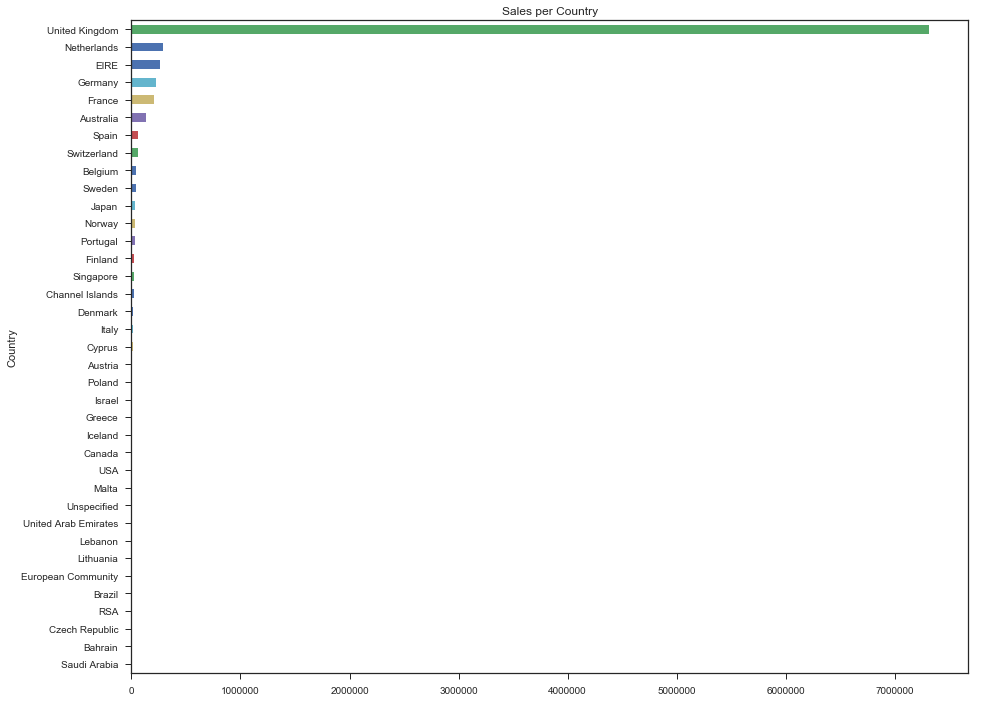

In [173]:
Sales_countries = Retail.groupby(["Country"])["TotalPrice"].sum().sort_values()
Sales_countries.plot(kind='barh', figsize=(15,12))
plt.title("Sales per Country")
plt.show()

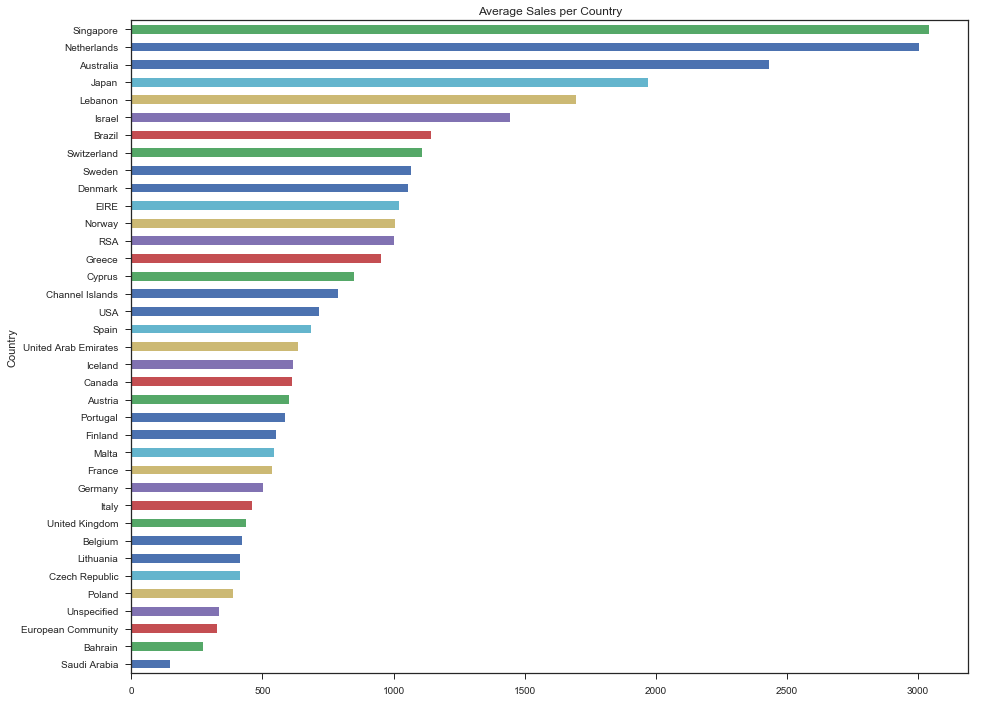

In [174]:
Average_Sales = Retail.groupby(["Country", "InvoiceNo"])["TotalPrice"].sum().reset_index().groupby(["Country"])["TotalPrice"].mean().sort_values()
Average_Sales.plot(kind='barh', figsize=(15,12))
plt.title("Average Sales per Country")
plt.show()

In [175]:
unique_cust = Retail[['Country','CustomerID']].drop_duplicates()
unique_cust.shape

(4347, 2)

In [176]:
unique_cust[["Country", "CustomerID"]].groupby(["Country"])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [177]:
#Most customer are from UK

In [178]:
Retail = Retail.loc[Retail['Country'] == 'United Kingdom']

In [179]:
Retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object

In [180]:
Retail['CustomerID'] = Retail['CustomerID'].astype(object)

In [181]:
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
unique_counts(Retail)
Retail.describe()

(u'InvoiceNo', ': ', 16649)
(u'StockCode', ': ', 3645)
(u'Description', ': ', 3833)
(u'Quantity', ': ', 294)
(u'InvoiceDate', ': ', 15615)
(u'UnitPrice', ': ', 403)
(u'CustomerID', ': ', 3921)
(u'Country', ': ', 1)
('TotalPrice', ': ', 2793)


,Quantity,UnitPrice,TotalPrice
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,20.625073
std,190.428127,17.862067,326.033014
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.160000
50%,4.000000,1.950000,10.200000
75%,12.000000,3.750000,17.700000
max,80995.000000,8142.750000,168469.600000


In [182]:
Retail['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [183]:
Retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [184]:
NOW = dt.datetime(2011,12,11)

In [185]:
#Create Recency, Frequency, Monetary

In [186]:
Retail_RFM = Retail.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

Retail_RFM['InvoiceDate'] = Retail_RFM['InvoiceDate'].astype(int)
Retail_RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalPrice': 'Monetary_value'}, inplace=True)




In [187]:
Retail_RFM.head(5)

,Frequency,Monetary_value,Recency
CustomerID,,,
12346.0,1,77183.60,326
12747.0,103,4196.01,3
12748.0,4596,33719.73,1
12749.0,199,4090.88,4
12820.0,59,942.34,4


In [188]:
Retail_RFM.shape

(3921, 3)

In [189]:
Retail_RFM.describe()

,Frequency,Monetary_value,Recency
count,3921.000000,3921.000000,3921.000000
mean,90.371079,1863.910113,92.722265
std,217.796155,7481.922217,99.528532
min,1.000000,0.000000,1.000000
25%,17.000000,300.040000,18.000000
50%,41.000000,651.820000,51.000000
75%,99.000000,1575.890000,143.000000
max,7847.000000,259657.300000,374.000000


In [190]:
Retail_RFM[Retail_RFM['Monetary_value'] == 0]

,Frequency,Monetary_value,Recency
CustomerID,,,
13256.0,1,0.0,15


In [191]:
Retail_RFM = Retail_RFM[Retail_RFM['Monetary_value'] != 0]

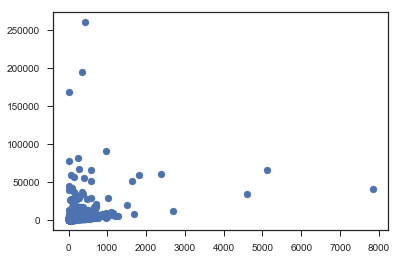

In [192]:
plt.scatter(Retail_RFM.iloc[:, 0], Retail_RFM.iloc[:, 1])

In [193]:
# Pairplot

In [194]:
import seaborn as sns

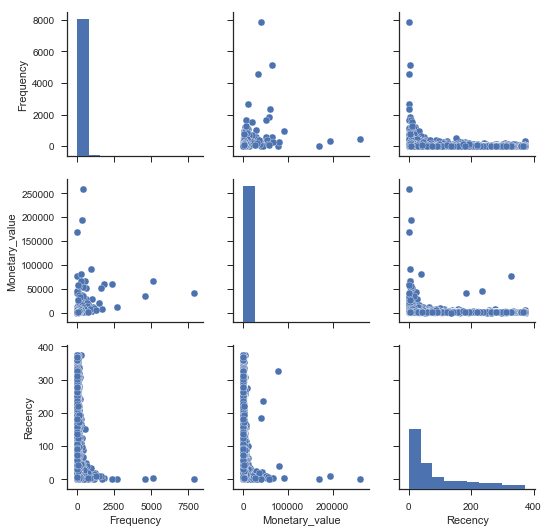

In [195]:
sns.pairplot(Retail_RFM)
sns.set(style="ticks", color_codes=True)

In [196]:
#View the data distribution

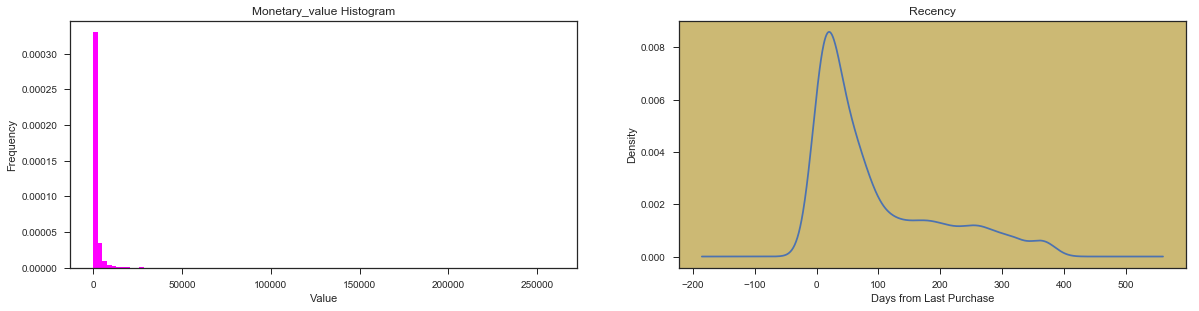

Text(0,0.5,u'Frequency')

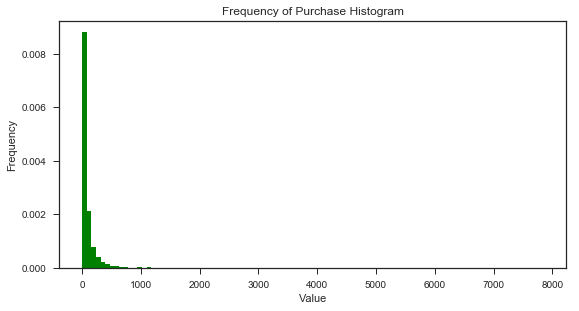

In [197]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.hist(Retail_RFM['Monetary_value'],bins=100, density = True, color = "magenta")
plt.title("Monetary_value Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(222, facecolor='y')
Retail_RFM['Recency'].plot(kind='density')
plt.title('Recency')
plt.xlabel('Days from Last Purchase')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(223)
plt.hist(Retail_RFM['Frequency'],bins=100, density = True, color = "green")
plt.title("Frequency of Purchase Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")


In [198]:
# Log transform Data for normalisation as highly skewed

In [199]:
def Log_Transform(df):
    for x in df.columns:
        df[x] = df[x].apply(np.log)
    return df
        
    
Retail_RFM = Log_Transform(Retail_RFM)

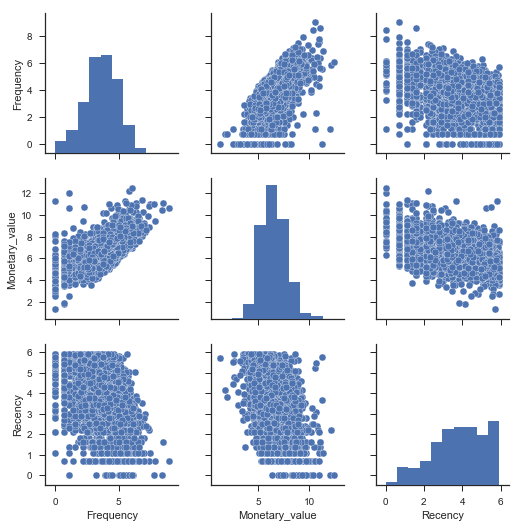

In [200]:
sns.pairplot(Retail_RFM)

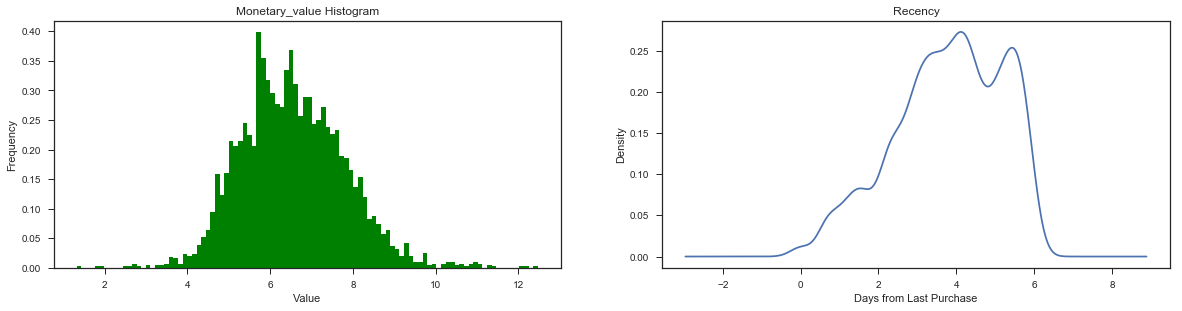

Text(0,0.5,u'Frequency')

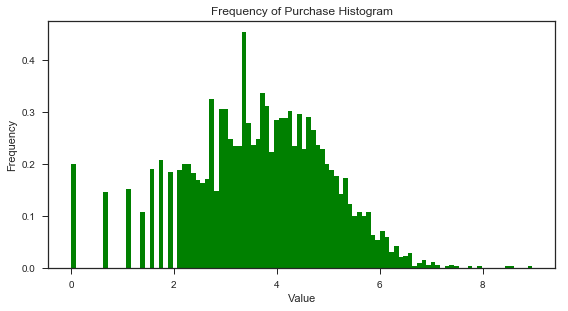

In [201]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.hist(Retail_RFM['Monetary_value'],bins=100, density = True, color = "green")
plt.title("Monetary_value Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(222, facecolor='w')
Retail_RFM['Recency'].plot(kind='density')
plt.title('Recency')
plt.xlabel('Days from Last Purchase')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(223)
plt.hist(Retail_RFM['Frequency'],bins=100, density = True, color = "green")
plt.title("Frequency of Purchase Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

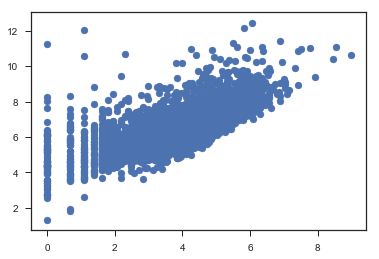

In [202]:
plt.scatter(Retail_RFM.iloc[:, 0], Retail_RFM.iloc[:, 1])

# KMeans Clustering

In [203]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [204]:
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Retail_RFM)
    kmeanModel.fit(Retail_RFM)
    distortions.append(sum(np.min(cdist(Retail_RFM, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Retail_RFM.shape[0])

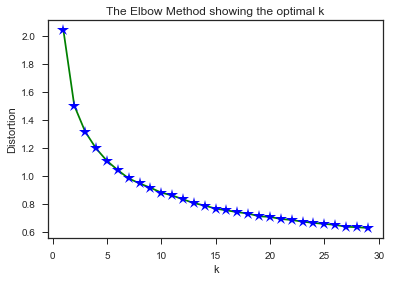

In [205]:
 # Plot the elbow
plt.plot(K, distortions, color='green', linestyle='solid', marker='*', markerfacecolor='blue', markersize=12)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [206]:
km = KMeans(n_clusters=6, init='k-means++', n_init=10)

In [207]:
km.fit(Retail_RFM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [208]:
x = km.fit_predict(Retail_RFM)
x

array([2, 3, 3, ..., 1, 3, 0])

In [209]:
Retail_RFM["Cluster"] = x

In [210]:
Retail_RFM.dtypes

Frequency         float64
Monetary_value    float64
Recency           float64
Cluster             int32
dtype: object

In [211]:
Retail_RFM['Cluster'] = Retail_RFM['Cluster'].astype(object)

In [212]:
Retail_RFM[['Recency', 'Frequency', 'Monetary_value']].describe()

,Recency,Frequency,Monetary_value
count,3920.000000,3920.000000,3920.000000
mean,3.798750,3.662264,6.543204
std,1.382343,1.338422,1.247128
min,0.000000,0.000000,1.321756
25%,2.890372,2.833213,5.704715
50%,3.931826,3.713572,6.480474
75%,4.962845,4.597632,7.363016
max,5.924256,8.967887,12.467118


In [213]:
Retail_RFM[Retail_RFM['Cluster'] == 0].describe()

,Frequency,Monetary_value,Recency
count,914.000000,914.000000,914.000000
mean,4.507136,7.287320,3.947740
std,0.605666,0.622067,0.615337
min,1.098612,5.677849,2.833213
25%,4.094345,6.852451,3.441924
50%,4.521789,7.259573,3.931826
75%,4.905275,7.676606,4.330733
max,6.371612,10.704015,5.921578


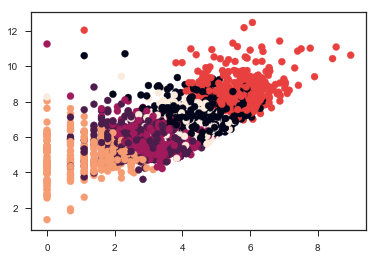

In [214]:
# Monetary value and frequency scatter plot
plt.scatter(Retail_RFM.iloc[:, 0], Retail_RFM.iloc[:, 1],  c=x)

In [215]:
Retail_RFM.groupby('Cluster').describe()


Frequency                                                              \
            count      mean       std       min       25%       50%       75%   
Cluster                                                                         
0           914.0  4.507136  0.605666  1.098612  4.094345  4.521789  4.905275   
1           742.0  2.933257  0.718250  0.000000  2.484907  2.995732  3.433987   
2           822.0  3.280277  0.589674  0.000000  2.890372  3.258097  3.663562   
3           450.0  5.625244  0.712190  1.098612  5.169035  5.600270  6.020416   
4           498.0  1.550226  0.804229  0.000000  1.098612  1.791759  2.197225   
5           494.0  4.170677  0.666102  0.000000  3.761200  4.219508  4.632290   

                  Monetary_value              ...                          \
              max          count      mean    ...          75%        max   
Cluster                                       ...                           
0        6.371612          914.0  7.287320    ...     7.676606  10.704015   
1        4.574711          742.0  5.803999    ...     6.214948   8.817120   
2        5.017280          822.0  6.028150    ...     6.433390  11.253942   
3        8.967887          450.0  8.566599    ...     8.892543  12.467118   
4        3.135494          498.0  4.943121    ...     5.317777   8.037866   
5        5.680173          494.0  6.903644    ...     7.376194   9.424944   

        Recency                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0         914.0  3.947740  0.615337  2.833213  3.441924  3.931826  4.330733   
1         742.0  3.484899  0.640172  0.693147  3.091042  3.583519  3.988984   
2         822.0  5.231036  0.451267  4.234107  4.897840  5.283204  5.594711   
3         450.0  1.940688  0.918815  0.000000  1.098612  2.079442  2.708050   
4         498.0  5.098201  0.705728  2.079442  4.713995  5.308268  5.616771   
5         494.0  1.993817  0.729084  0.000000  1.386294  2.197225  2.564949   

                   
              max  
Cluster            
0        5.921578  
1        4.477337  
2        5.924256  
3        3.761200  
4        5.924256  
5        3.091042  

[6 rows x 24 columns]

In [216]:
Retail_RFM_data = Retail_RFM.groupby('Cluster').aggregate({'Frequency':np.mean, 'Monetary_value':np.mean, 'Recency':np.mean})


In [217]:
Retail_RFM_data = Retail_RFM_data.reset_index()

In [218]:
Retail_RFM_data.sort_values('Monetary_value', ascending=False)

,Cluster,Frequency,Recency,Monetary_value
3,3,5.625244,1.940688,8.566599
0,0,4.507136,3.947740,7.287320
5,5,4.170677,1.993817,6.903644
2,2,3.280277,5.231036,6.028150
1,1,2.933257,3.484899,5.803999
4,4,1.550226,5.098201,4.943121


In [219]:
k = (Retail_RFM_data['Cluster']).apply(lambda x: "Rank 1" if x == 3 else "Rank 2" if x == 0 else "Rank 3" if x == 4 else "Rank 4" if x== 1 else "Rank 5" if x == 2 else "Rank 6" )

In [220]:
Retail_RFM_data['Rank'] = k

In [221]:
Retail_RFM_data.sort_values('Monetary_value', ascending=False)

,Cluster,Frequency,Recency,Monetary_value,Rank
3,3,5.625244,1.940688,8.566599,Rank 1
0,0,4.507136,3.947740,7.287320,Rank 2
5,5,4.170677,1.993817,6.903644,Rank 6
2,2,3.280277,5.231036,6.028150,Rank 5
1,1,2.933257,3.484899,5.803999,Rank 4
4,4,1.550226,5.098201,4.943121,Rank 3


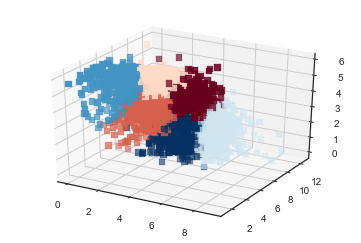

In [222]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(Retail_RFM['Frequency'])
y = np.array(Retail_RFM['Monetary_value'])
z = np.array(Retail_RFM['Recency'])

ax.scatter(x,y,z, marker="s", c=Retail_RFM["Cluster"], s=40, cmap="RdBu")

plt.show()

In [223]:
Retail.head(5)
Retail.shape

(354345, 9)

In [224]:
Retail_RFM_1 = Retail_RFM.reset_index()
Retail_RFM_1.shape
Retail_RFM_1 = Retail_RFM_1.drop(['Frequency', 'Monetary_value', 'Recency'], axis =1)

In [225]:
Retail_RFM_New = pd.merge(Retail, Retail_RFM_1, on='CustomerID')

In [226]:
Retail_RFM_New[Retail_RFM_New['Cluster'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,0
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850,United Kingdom,11.10,0


In [227]:
Retail_RFM_New.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
TotalPrice            float64
Cluster                object
dtype: object

In [228]:
y = (Retail_RFM_New['Cluster']).apply(lambda x: "Rank 1" if x == 3 else "Rank 2" if x == 0 else "Rank 3" if x == 1 else "Rank 4" if x== 4 else "Rank 5" if x == 2 else "Rank 6" )

In [229]:
Retail_RFM_New['Rank'] = y

In [230]:
Retail_RFM_New.groupby('Rank').agg({"TotalPrice":sum})

,TotalPrice
Rank,
Rank 1,4135768.530
Rank 2,1688274.802
Rank 3,304777.301
Rank 4,96558.520
Rank 5,481847.461
Rank 6,601164.940


In [231]:
# Check the result for one random customer

In [232]:
Retail_RFM_New.loc[Retail_RFM_New['CustomerID'] == 17850, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cluster,Rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0,Rank 2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,Rank 2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0,Rank 2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,Rank 2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,Rank 2
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,0,Rank 2
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,0,Rank 2
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,0,Rank 2
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,0,Rank 2
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850,United Kingdom,11.10,0,Rank 2


# DBSCAN()

In [233]:
DBSCAN()

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [234]:
Retail_RFM.dtypes

Frequency         float64
Monetary_value    float64
Recency           float64
Cluster            object
dtype: object

In [235]:
Retail_RFM = Retail_RFM.drop("Cluster", axis = 1)

In [236]:
NearestNeighbors()

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [237]:
nbrs = NearestNeighbors(20).fit(Retail_RFM)
nbrs


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

In [238]:
distances, indices = nbrs.kneighbors(Retail_RFM)

In [239]:
kDis = distances[:, 4]
kDis.sort()
kDis = kDis[range(len(kDis)-1, 0, -1)]


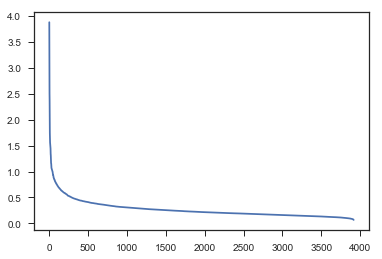

In [240]:
plt.plot(range(0,len(kDis)), kDis)
plt.show()

In [241]:
model = cluster.DBSCAN(eps=0.5, min_samples = 10)

In [242]:
results =model.fit(Retail_RFM)
labels = results.labels_

In [243]:
clusters = np.unique(labels)
clusters

array([-1,  0,  1,  2], dtype=int64)

C:\Users\Vijeta Tulsiyan\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


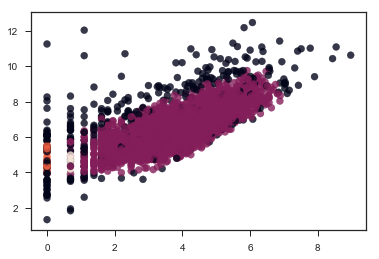

In [244]:
plt.scatter(Retail_RFM.ix[:,0], Retail_RFM.ix[:,1], c= results.labels_, alpha = 0.8)
plt.show()

In [245]:
Retail_RFM_dbscan = Retail_RFM

In [246]:
Retail_RFM_dbscan['Cluster'] = results.labels_

In [247]:
Retail_RFM_data = Retail_RFM_dbscan.groupby('Cluster').aggregate({'Frequency':np.mean, 'Monetary_value':np.mean, 'Recency':np.mean})


In [248]:


Retail_RFM_data 

,Frequency,Recency,Monetary_value
Cluster,,,
-1,3.016083,2.907084,7.178579
0,3.756921,3.865489,6.505659
1,0.000000,5.616943,4.619473
2,0.726936,4.371976,4.475218


In [249]:
Retail_RFM_dbscan['Cluster'].value_counts()

 0    3558
-1     325
 1      25
 2      12
Name: Cluster, dtype: int64

In [250]:
Retail_RFM_2 = Retail_RFM_dbscan.reset_index()
Retail_RFM_2.shape
Retail_RFM_2 = Retail_RFM_2.drop(['Frequency', 'Monetary_value', 'Recency'], axis =1)

In [251]:
Retail_RFM_New2 = pd.merge(Retail, Retail_RFM_2, on='CustomerID')

In [252]:
Retail_RFM_New2['Cluster'].value_counts()

 0    287215
-1     67079
 2        25
 1        25
Name: Cluster, dtype: int64

In [253]:
Retail_RFM_New['Cluster'].value_counts()

3    170011
0     98945
5     38887
2     25939
1     17516
4      3046
Name: Cluster, dtype: int64

In [254]:
Retail_RFM_dbscan_1= Retail_RFM_dbscan.groupby('Cluster').aggregate({'Frequency':np.mean, 'Monetary_value':np.mean, 'Recency':np.mean})
Retail_RFM_dbscan_1.sort_values('Monetary_value')

,Frequency,Recency,Monetary_value
Cluster,,,
2,0.726936,4.371976,4.475218
1,0.000000,5.616943,4.619473
0,3.756921,3.865489,6.505659
-1,3.016083,2.907084,7.178579


In [255]:
Retail_RFM_dbscan['Cluster'] = Retail_RFM_dbscan['Cluster'].astype(object)

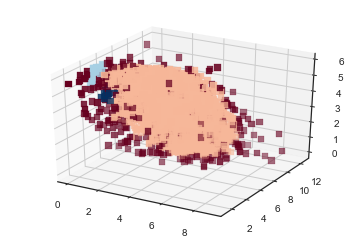

In [256]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(Retail_RFM_dbscan['Frequency'])
y = np.array(Retail_RFM_dbscan['Monetary_value'])
z = np.array(Retail_RFM_dbscan['Recency'])

ax.scatter(x,y,z, marker="s", c=Retail_RFM_dbscan["Cluster"], s=40, cmap="RdBu")

plt.show()

# HIERARCHICAL CLUSTERING

In [257]:
import scipy.cluster.hierarchy as sch

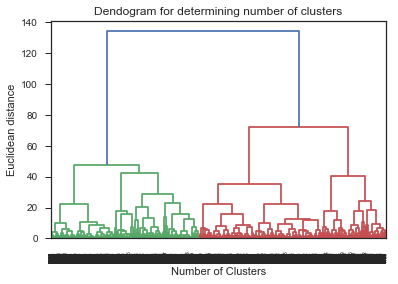

In [258]:
dendogram = sch.dendrogram(sch.linkage(Retail_RFM, method = 'ward'))
plt.title('Dendogram for determining number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Euclidean distance')
plt.show()


In [259]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')


In [260]:
results_h = hc.fit(Retail_RFM)
results_h

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x0000000007F56B38>)

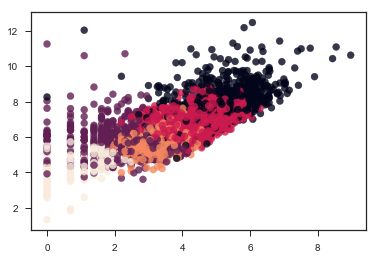

In [261]:
plt.scatter(Retail_RFM.ix[:,0], Retail_RFM.ix[:,1], c= results_h.labels_, alpha = 0.8)
plt.show()

In [262]:
Retail_RFM_HCA = Retail_RFM

In [263]:
Retail_RFM_HCA['Cluster'] = results_h.labels_

In [264]:
Retail_RFM_H = Retail_RFM_HCA.groupby('Cluster').aggregate({'Frequency':np.mean, 'Monetary_value':np.mean, 'Recency':np.mean})


In [265]:
Retail_RFM_H.sort_values('Monetary_value', ascending = False)

,Frequency,Recency,Monetary_value
Cluster,,,
0,5.011790,1.831185,7.988762
2,4.275847,3.752036,6.955853
3,3.156129,5.382699,5.789546
1,2.400368,3.803750,5.702116
4,1.286357,5.322988,4.514402


In [266]:
Retail_RFM_HCA['Cluster'] = Retail_RFM_HCA['Cluster'].astype(object)

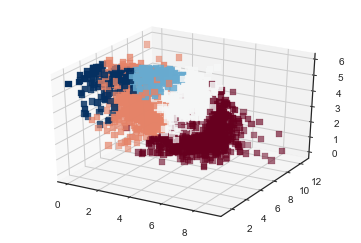

In [267]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(Retail_RFM_HCA['Frequency'])
y = np.array(Retail_RFM_HCA['Monetary_value'])
z = np.array(Retail_RFM_HCA['Recency'])

ax.scatter(x,y,z, marker="s", c=Retail_RFM_HCA["Cluster"], s=40, cmap="RdBu")

plt.show()